In [ ]:
#Ques1 answer-

In [1]:
import pandas as pd 
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")

In [2]:
#Loading all datasets first

In [3]:
df1=pd.read_csv(r"E:\database_USA.csv",sep=",")
df1.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,USA,United States of America,10 Briggs Solar NG LLC (East),USA0062781,0.0,41.6327,-71.4963,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USA,United States of America,100 Brook Hill Drive Solar,USA0063292,2.0,41.0930,-73.9828,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,2.467,U.S. Energy Information Administration,NaN
2,USA,United States of America,1001 Ebenezer Church Solar,USA0063444,0.0,36.2838,-80.8434,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USA,United States of America,1008 Matthews Solar,USA0063447,0.0,36.2167,-80.5525,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,United States of America,1009 Yadkin Solar,USA0063445,0.0,36.1475,-80.6561,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df2=pd.read_csv(r"E:\database_IND.csv",sep=",")
df2.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
df3=pd.read_csv(r"E:\database_AUS.csv",sep=",")
df3.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Joining all the datasets using concate

In [60]:
df4=pd.concat([df1,df2,df3],ignore_index=True)

In [61]:
df4

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,USA,United States of America,10 Briggs Solar NG LLC (East),USA0062781,0.00,41.6327,-71.4963,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USA,United States of America,100 Brook Hill Drive Solar,USA0063292,2.00,41.0930,-73.9828,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,2.467,U.S. Energy Information Administration,NaN
2,USA,United States of America,1001 Ebenezer Church Solar,USA0063444,0.00,36.2838,-80.8434,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USA,United States of America,1008 Matthews Solar,USA0063447,0.00,36.2167,-80.5525,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,United States of America,1009 Yadkin Solar,USA0063445,0.00,36.1475,-80.6561,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13293,AUS,Australia,Yarrawonga,AUS0000101,9.00,-36.0094,145.9995,Hydro,NaN,NaN,...,2019.0,38.216111,44.224722,50.183889,46.035278,31.444722,37.317778,NaN,Australia Clean Energy Regulator,NaN
13294,AUS,Australia,Yarwun,AUS0000173,154.00,-23.8306,151.1519,Gas,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13295,AUS,Australia,Yuendumu,AUS0000465,0.24,-22.2426,131.7931,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,5.216667,5.176944,5.341111,NaN,Australia Clean Energy Regulator,NaN
13296,AUS,Australia,Yulara,AUS0000257,10.95,-25.2323,130.9912,Gas,NaN,NaN,...,2019.0,21.947500,22.775000,24.086111,23.043889,19.885000,19.558056,NaN,Australia Clean Energy Regulator,NaN


In [62]:
df4.shape

(13298, 27)

In [63]:
#Checking for duplicates and removing if any:
df4.drop_duplicates(inplace=True)

In [64]:
#Checking for nulls
df4.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     6
latitude                       78
longitude                      78
primary_fuel                 2004
other_fuel1                 11670
other_fuel2                 13028
other_fuel3                 13206
commissioning_year           2644
owner                         593
source                          0
url                             0
geolocation_source             23
wepp_id                     13298
year_of_capacity_data         438
generation_gwh_2013          6128
generation_gwh_2014          5764
generation_gwh_2015          5305
generation_gwh_2016          4597
generation_gwh_2017          4006
generation_gwh_2018          3440
generation_gwh_2019          3520
generation_data_source       2463
estimated_generation_gwh    13298
dtype: int64

In [65]:
#We can remove the columns 'otherfuel2','otherfuel3','wepp_id','estimated_generation_gwh' as they have very few data for analysis
#Here 'name','generation_data_source','year_of_capacity_data','commissioning_year'country','url','country_long' ,'name','gppd_idnr' are also  bogus column

In [66]:
df4 = df4.drop(df4.columns[[0,1,2,3,9,10,11,12,13,14,15,16,17,25,26]], axis=1)

In [67]:
df4.shape

(13298, 12)

In [68]:
df4.describe()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,13292.000000,13220.000000,13220.000000,7170.000000,7534.000000,7993.000000,8701.000000,9292.000000,9858.000000
mean,117.738717,35.053213,-73.794217,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016
std,347.169038,15.444195,62.868834,2030.523760,2193.172655,2148.167470,2050.411295,2001.411908,1963.485305
min,0.000000,-42.888300,-171.712400,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000
25%,1.500000,33.901700,-104.659875,1.653075,2.018000,2.140000,2.108000,2.063750,2.141250
50%,5.500000,38.389750,-87.346000,21.384500,22.241000,19.504000,15.410278,13.433861,12.308500
75%,52.725000,42.175125,-75.475925,185.326498,217.069500,200.279000,173.348004,157.889688,149.141249
max,6809.000000,425.246100,153.434100,31431.080000,32320.917000,32525.595000,32377.477000,35116.000000,35136.000000


In [87]:
df4

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0.00,41.6327,-71.4963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.00,41.0930,-73.9828,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.467
2,0.00,36.2838,-80.8434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.00,36.2167,-80.5525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.00,36.1475,-80.6561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13293,9.00,-36.0094,145.9995,Hydro,NaN,38.216111,44.224722,50.183889,46.035278,31.444722,37.317778,NaN
13294,154.00,-23.8306,151.1519,Gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13295,0.24,-22.2426,131.7931,Solar,NaN,NaN,NaN,NaN,5.216667,5.176944,5.341111,NaN
13296,10.95,-25.2323,130.9912,Gas,NaN,21.947500,22.775000,24.086111,23.043889,19.885000,19.558056,NaN


In [88]:
#Checking for nulls
df4.isnull().sum()

capacity_mw                6
latitude                  78
longitude                 78
primary_fuel            2004
other_fuel1            11670
generation_gwh_2013     6128
generation_gwh_2014     5764
generation_gwh_2015     5305
generation_gwh_2016     4597
generation_gwh_2017     4006
generation_gwh_2018     3440
generation_gwh_2019     3520
dtype: int64

In [70]:
# Above ,we can clearly observe the NULL are there in all columns

In [71]:
#We will try to fill null 
#We will also change dtype for 'primary_fuel'

In [108]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
lab=LabelEncoder()

In [110]:
for col in df4.columns:
    df4[col] = lab.fit_transform(df4[col].astype(str))

In [113]:
df4.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
generation_gwh_2019    0
dtype: int64

In [114]:
df4.describe()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,13298.000000,13298.000000,13298.000000,13298.000000,13298.000000,13298.000000,13298.000000,13298.000000,13298.000000,13298.000000,13298.000000,13298.000000
mean,815.068883,6252.087532,6378.950068,8.411340,11.108964,3885.104377,4283.686494,4424.535720,4497.491803,4618.459167,4676.350128,5034.227102
std,716.867901,3563.807539,3693.819297,4.256073,2.475831,2058.907764,2310.236643,2458.288284,2646.170360,2812.668711,2943.194346,2959.734167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,3198.250000,3164.250000,5.000000,12.000000,2072.250000,2227.250000,2200.250000,2025.250000,1961.250000,1883.250000,2339.250000
50%,760.000000,6266.500000,6360.500000,10.000000,12.000000,5128.500000,5439.500000,5390.500000,5179.500000,5099.500000,5013.500000,5387.500000
75%,1421.000000,9306.750000,9572.750000,13.000000,12.000000,5616.000000,6306.000000,6692.000000,7150.000000,7630.000000,8040.000000,8368.000000
max,2304.000000,12385.000000,12733.000000,14.000000,12.000000,5616.000000,6306.000000,6692.000000,7150.000000,7630.000000,8040.000000,8368.000000


In [ ]:
#Now our dataset seems good and we can proceed to EDA

In [116]:
df4.shape

(13298, 12)

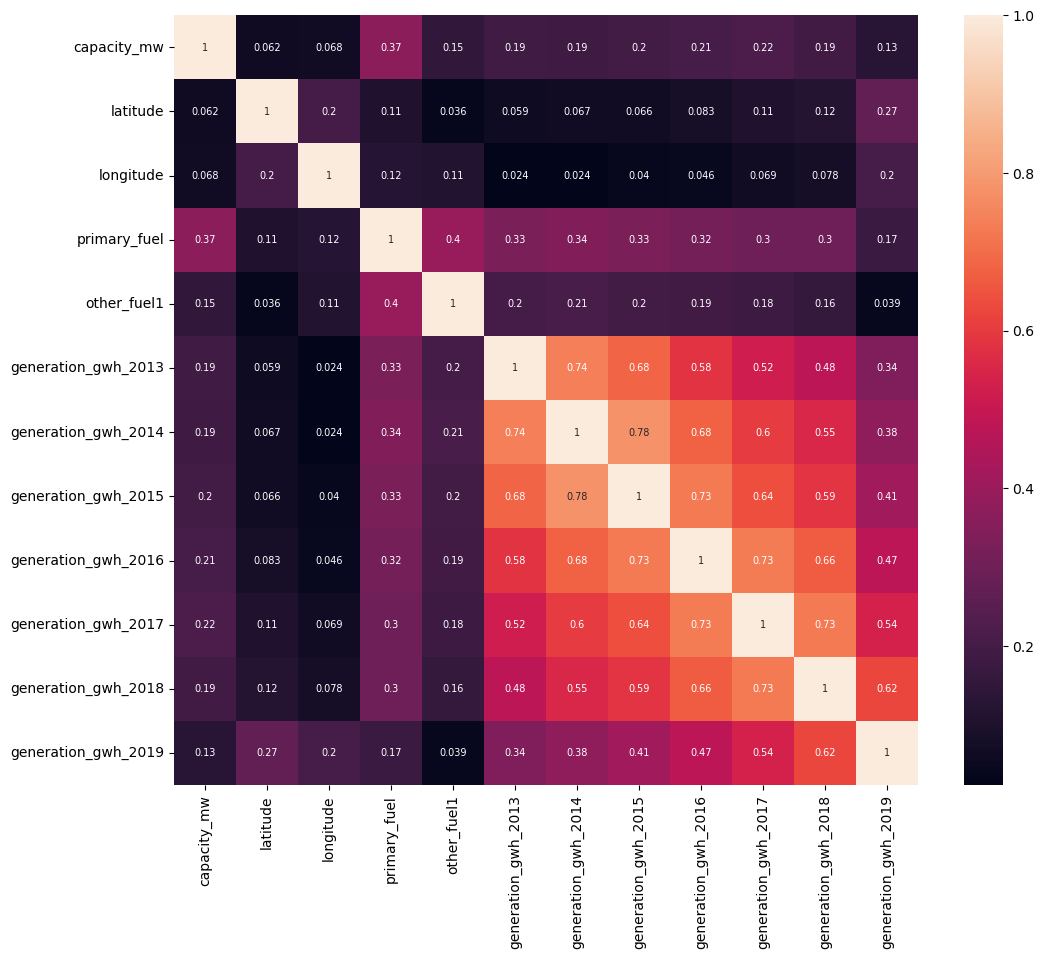

In [120]:
dfheat= df4.corr().abs()
plt.figure(figsize=(12,10))
sns.heatmap(dfheat, annot=True, annot_kws={'size':7})
plt.show()

In [121]:
#Here we can observe that primary fuel is more related to 'generation_gwh's','capaity_mw'

<Axes: xlabel='primary_fuel', ylabel='capacity_mw'>

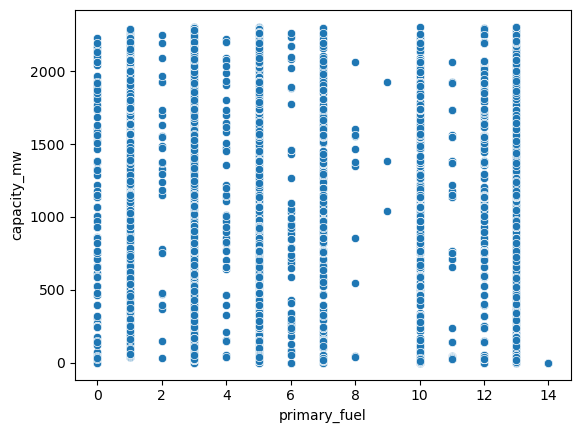

In [133]:
#Relation of 'primary_fuel' with 'capacity_mw'
sns.scatterplot(x='primary_fuel', y='capacity_mw',data=df4)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2013'>

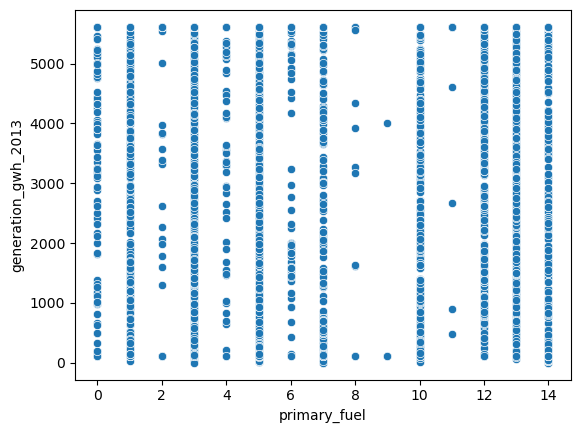

In [134]:
#Relation of 'primary_fuel' with 'generation_gwh_2013'
sns.scatterplot(x='primary_fuel', y='generation_gwh_2013',data=df4)

In [141]:
#Adjusting outliers:
from scipy.stats import zscore
score= zscore(df4)
absscore=np.abs(score)

filtering= (absscore<3).all(axis=1)
df4=df4[filtering]
df4.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0,8624,4005,14,12,5616,6306,6692,7150,7630,8040,8368
1,754,8185,4855,10,12,5616,6306,6692,7150,7630,8040,2983
2,0,5115,7154,14,12,5616,6306,6692,7150,7630,8040,8368
3,0,5054,7064,14,12,5616,6306,6692,7150,7630,8040,8368
4,0,5003,7095,14,12,5616,6306,6692,7150,7630,8040,8368


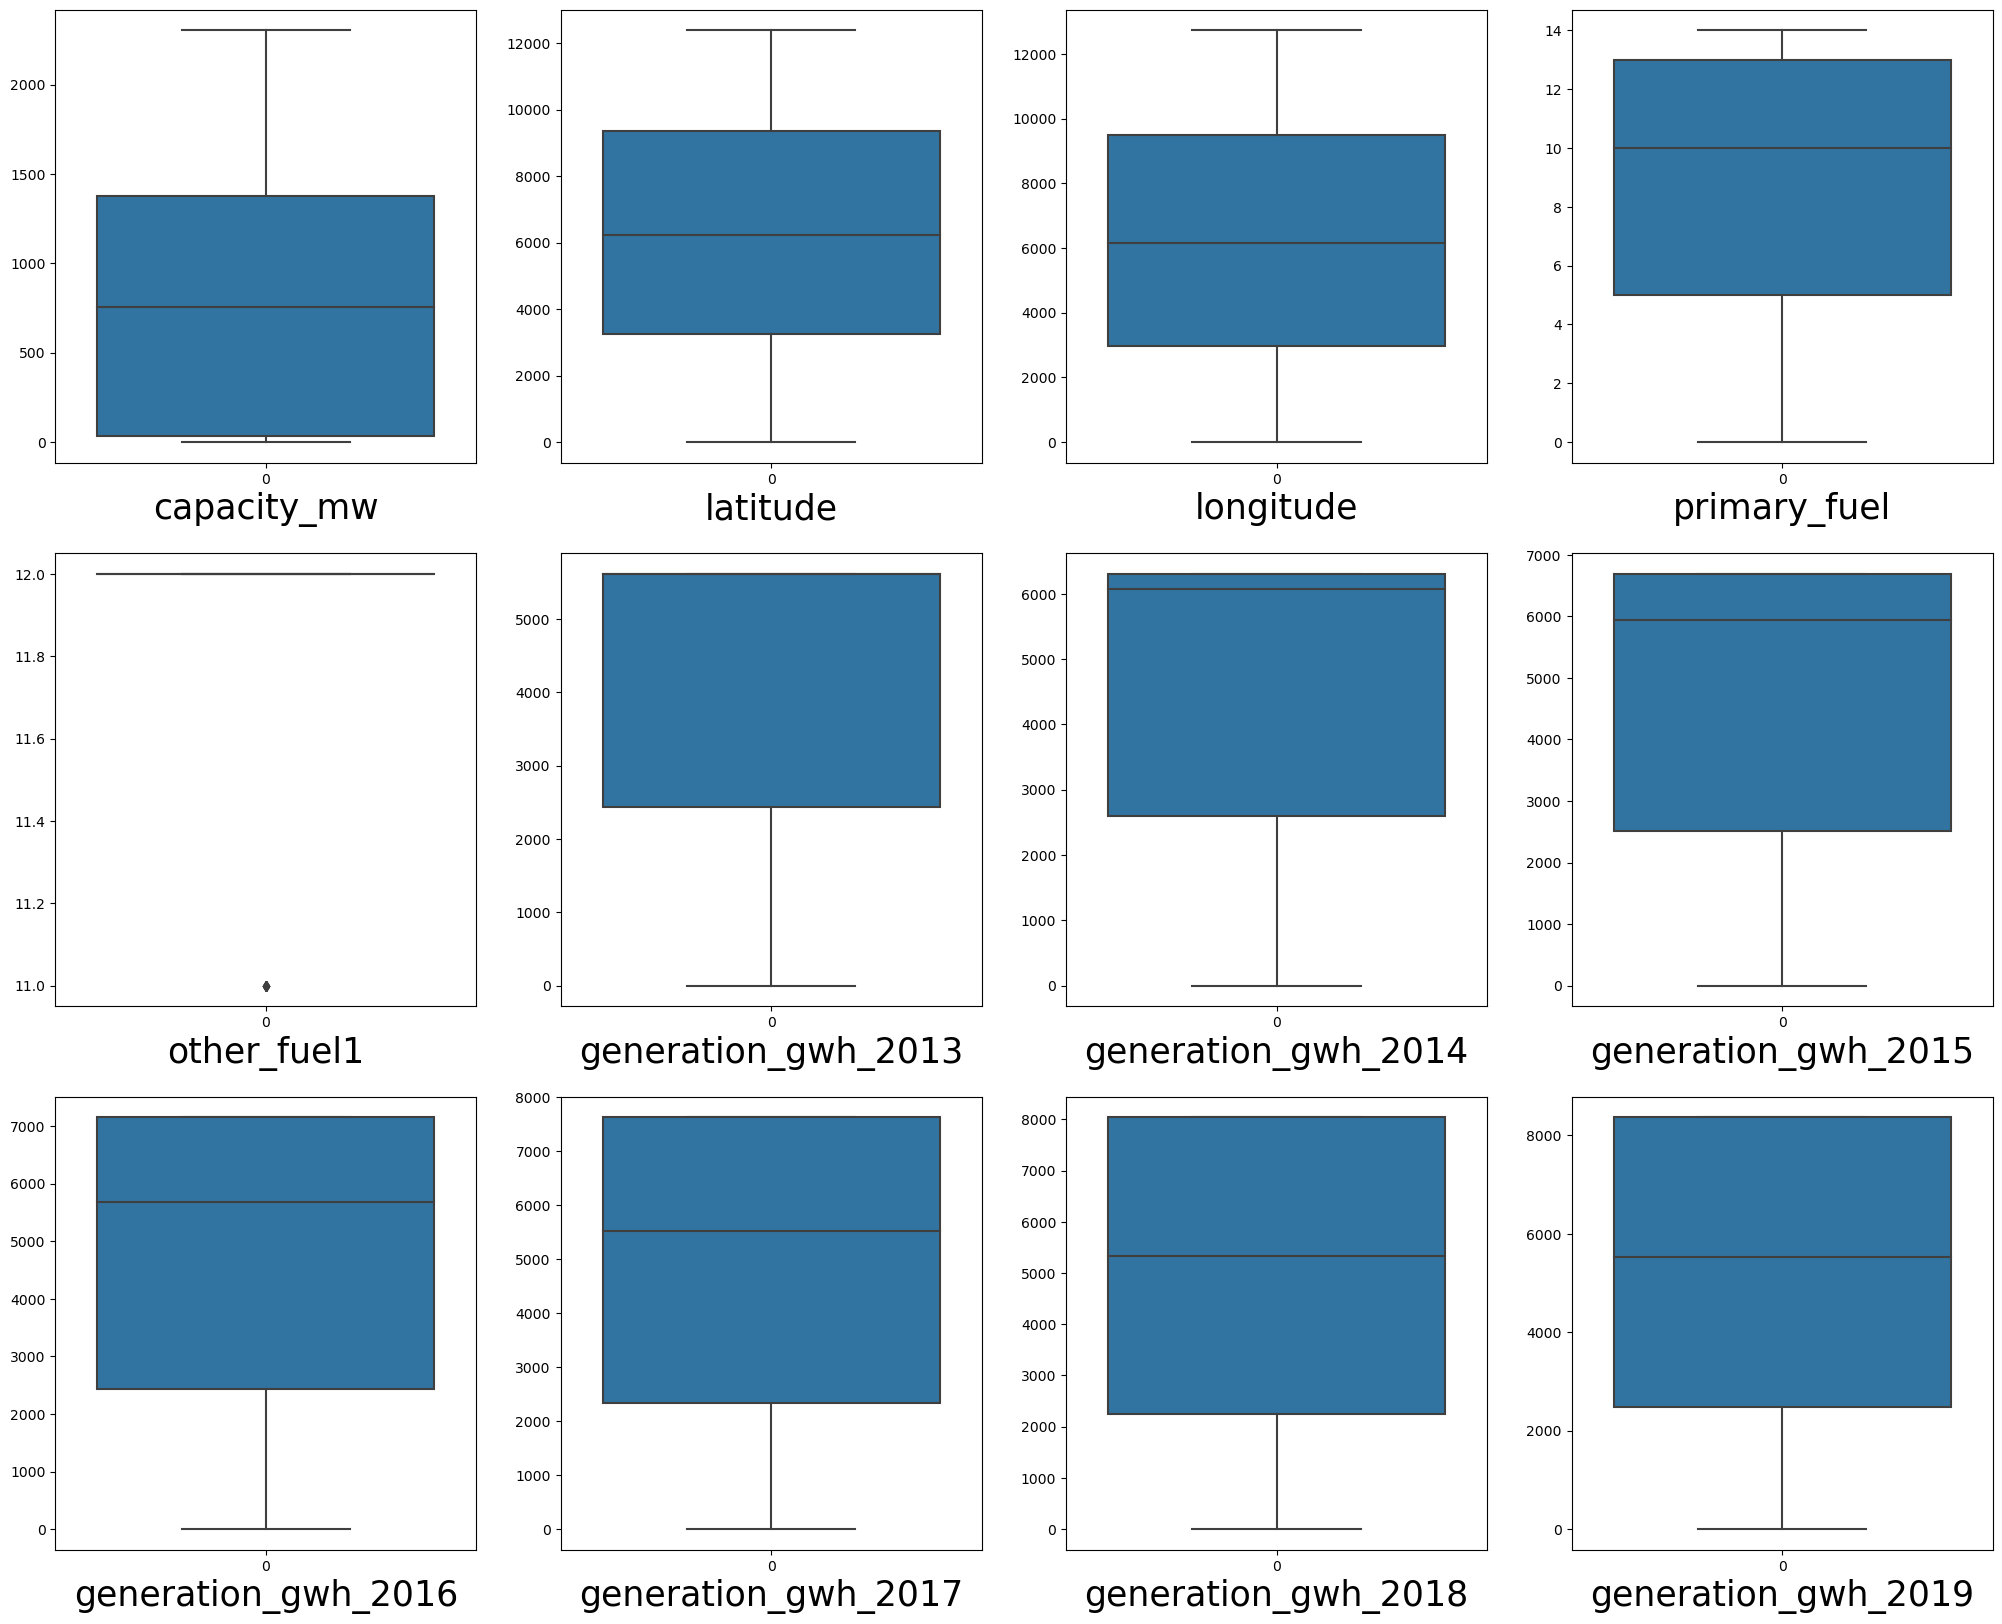

In [145]:
plt.figure(figsize=(25,20))
plot=1

for column in df4:
   if plot<=12:
       a=plt.subplot(3,4,plot)
       sns.boxplot(df4[column])
       plt.xlabel(column, fontsize=25)
    
   plot +=1 
plt.show()

In [253]:
# Let's remove outlier  using inter quantile range method:
q3=df4.quantile(0.75)
q1=df4.quantile(0.25)
iqr=q3-q1
iqr

capacity_mw            1346.00
latitude               6092.25
longitude              6524.25
primary_fuel              8.00
other_fuel1               0.00
generation_gwh_2013    3184.75
generation_gwh_2014    3713.75
generation_gwh_2015    4172.75
generation_gwh_2016    4716.75
generation_gwh_2017    5290.75
generation_gwh_2018    5789.75
generation_gwh_2019    5885.75
dtype: float64

In [255]:
oth= (q3.other_fuel1 + (1.5* iqr.other_fuel1))
print(oth)
index= np.where(df4['other_fuel1']> oth)
print(index)
df4= df4.drop(df4.index[index])
print(df4.shape)
df4.reset_index()

12.0
(array([], dtype=int64),)
(11670, 12)


,index,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0,0,8624,4005,14,12,5616,6306,6692,7150,7630,8040,8368
1,1,754,8185,4855,10,12,5616,6306,6692,7150,7630,8040,2983
2,2,0,5115,7154,14,12,5616,6306,6692,7150,7630,8040,8368
3,3,0,5054,7064,14,12,5616,6306,6692,7150,7630,8040,8368
4,4,0,5003,7095,14,12,5616,6306,6692,7150,7630,8040,8368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11665,13293,2190,373,11689,5,12,3574,4484,5098,4991,4208,4842,8368
11666,13294,493,109,11852,3,12,5616,6306,6692,7150,7630,8040,8368
11667,13295,12,88,11528,10,12,5616,6306,6692,5216,5546,5829,8368
11668,13296,52,122,11526,3,12,2320,2676,2930,2978,2484,2520,8368


In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier


In [154]:
#Model Building
x=df4.drop(columns=['primary_fuel'])
y=df4['primary_fuel']
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.70, random_state=58)

In [155]:
def score(model,x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred=model.predict(x_train)
        print('Train result')
        print(f"Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train==False:
        pred=model.predict(x_test)
        print('Test result')
        print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
        print('report',classification_report(y_test,pred,digits=2))

In [156]:
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train) 

DecisionTreeClassifier()

In [157]:
score(tree,x_train, x_test, y_train, y_test, train=True)
score(tree,x_train, x_test, y_train, y_test, train=False)

Train result
Accuracy score:100.00%
Test result
Accuracy score:67.06%
report               precision    recall  f1-score   support

           0       0.22      0.25      0.24        79
           1       0.21      0.25      0.23       130
           2       0.04      0.05      0.04        20
           3       0.38      0.37      0.37       925
           4       0.07      0.24      0.10        29
           5       0.59      0.54      0.57      1206
           6       0.15      0.25      0.19        40
           7       0.78      0.67      0.72       565
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         0
          10       0.82      0.83      0.83      2428
          11       0.88      0.88      0.88        66
          12       0.18      0.18      0.18       314
          13       0.51      0.52      0.51       921
          14       0.99      0.99      0.99      1443

    accuracy                           0.67      8169
   

In [161]:
random_model=RandomForestClassifier()
random_model.fit(x_train,y_train)
score(tree,x_train, x_test, y_train, y_test, train=True)
score(tree,x_train, x_test, y_train, y_test, train=False)

Train result
Accuracy score:100.00%
Test result
Accuracy score:67.06%
report               precision    recall  f1-score   support

           0       0.22      0.25      0.24        79
           1       0.21      0.25      0.23       130
           2       0.04      0.05      0.04        20
           3       0.38      0.37      0.37       925
           4       0.07      0.24      0.10        29
           5       0.59      0.54      0.57      1206
           6       0.15      0.25      0.19        40
           7       0.78      0.67      0.72       565
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         0
          10       0.82      0.83      0.83      2428
          11       0.88      0.88      0.88        66
          12       0.18      0.18      0.18       314
          13       0.51      0.52      0.51       921
          14       0.99      0.99      0.99      1443

    accuracy                           0.67      8169
   

In [172]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
score(knn,x_train, x_test, y_train, y_test, train=True)
score(knn,x_train, x_test, y_train, y_test, train=False)

Train result
Accuracy score:75.35%
Test result
Accuracy score:63.73%
report               precision    recall  f1-score   support

           0       0.14      0.23      0.18        79
           1       0.13      0.18      0.15       130
           2       0.00      0.00      0.00        20
           3       0.39      0.36      0.37       925
           4       0.11      0.21      0.14        29
           5       0.57      0.55      0.56      1206
           6       0.29      0.15      0.20        40
           7       0.75      0.65      0.70       565
           8       0.00      0.00      0.00         3
          10       0.72      0.84      0.78      2428
          11       0.46      0.20      0.28        66
          12       0.19      0.09      0.12       314
          13       0.52      0.44      0.48       921
          14       0.89      0.89      0.89      1443

    accuracy                           0.64      8169
   macro avg       0.37      0.34      0.35      8169
weig

In [ ]:
#Hypertuning of the model

In [173]:
from sklearn.svm import SVC
params = {'n_estimators':[12,15],'criterion':['entropy','gini'],'max_depth':[10,5],'min_samples_split':[10,17],
         'min_samples_leaf':[4,6]}
grd=GridSearchCV(random_model,param_grid=params)
grd.fit(x_train,y_train)
print('best',grd.best_params_)

best {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 15}


In [174]:
random_model=grd.best_estimator_
random_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=15)

In [175]:
score(random_model,x_train, x_test, y_train, y_test, train=True)
score(random_model,x_train, x_test, y_train, y_test, train=False)

Train result
Accuracy score:77.69%
Test result
Accuracy score:70.57%
report               precision    recall  f1-score   support

           0       0.42      0.16      0.24        79
           1       0.37      0.18      0.25       130
           2       0.00      0.00      0.00        20
           3       0.49      0.38      0.43       925
           4       0.00      0.00      0.00        29
           5       0.51      0.75      0.61      1206
           6       0.00      0.00      0.00        40
           7       0.82      0.69      0.75       565
           8       0.00      0.00      0.00         3
          10       0.73      0.93      0.82      2428
          11       1.00      0.56      0.72        66
          12       1.00      0.02      0.03       314
          13       0.67      0.37      0.48       921
          14       0.98      1.00      0.99      1443

    accuracy                           0.71      8169
   macro avg       0.50      0.36      0.38      8169
weig

In [177]:
#Second Model
x1=df4.drop(columns=['capacity_mw'])
y1=df4['capacity_mw']
x1_train, x1_test, y1_train, y1_test= train_test_split(x1,y1, test_size=0.80, random_state=78)

In [182]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
reg = LinearRegression()


In [184]:
rfmodel=RandomForestRegressor(random_state=30,n_estimators=90)
rfmodel.fit(x1_train,y1_train)

RandomForestRegressor(n_estimators=90, random_state=30)

In [185]:
y2_pred = rfmodel.predict(x1_train.values)
r2= metrics.r2_score(y1_train, y2_pred)

print('R squared value: ',r2)

R squared value:  0.9255017920989048


In [193]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x1_train,y1_train)

LogisticRegression()

In [194]:
log.score(x1_train,y1_train)

0.2352185089974293

In [201]:
from sklearn.tree import DecisionTreeRegressor
Dec=DecisionTreeRegressor()
Dec.fit(x1_train,y1_train)

DecisionTreeRegressor()

In [202]:
Dec.score(x1_train,y1_train)

0.9986766883345226

In [210]:
#Ques2 answer-

In [364]:
df5=pd.read_csv(r"E:\temperature.csv",sep=",")

In [365]:
df5

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [366]:
df5.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [367]:
#Let's first change data type of 'Date' column
dat= lab.fit_transform(df5['Date'])
df5['Date']=dat

In [368]:
#Observations:
#std<mean in all columns except 'slope','LDAPS_PPT's'
#Quarters are okay 
#We see some deviations in data in some column

In [369]:
#Checking for null
df5.isnull().sum()

station              2
Date                 0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [370]:
for col in df5.columns:
    df5[col] = lab.fit_transform(df5[col].astype(str))

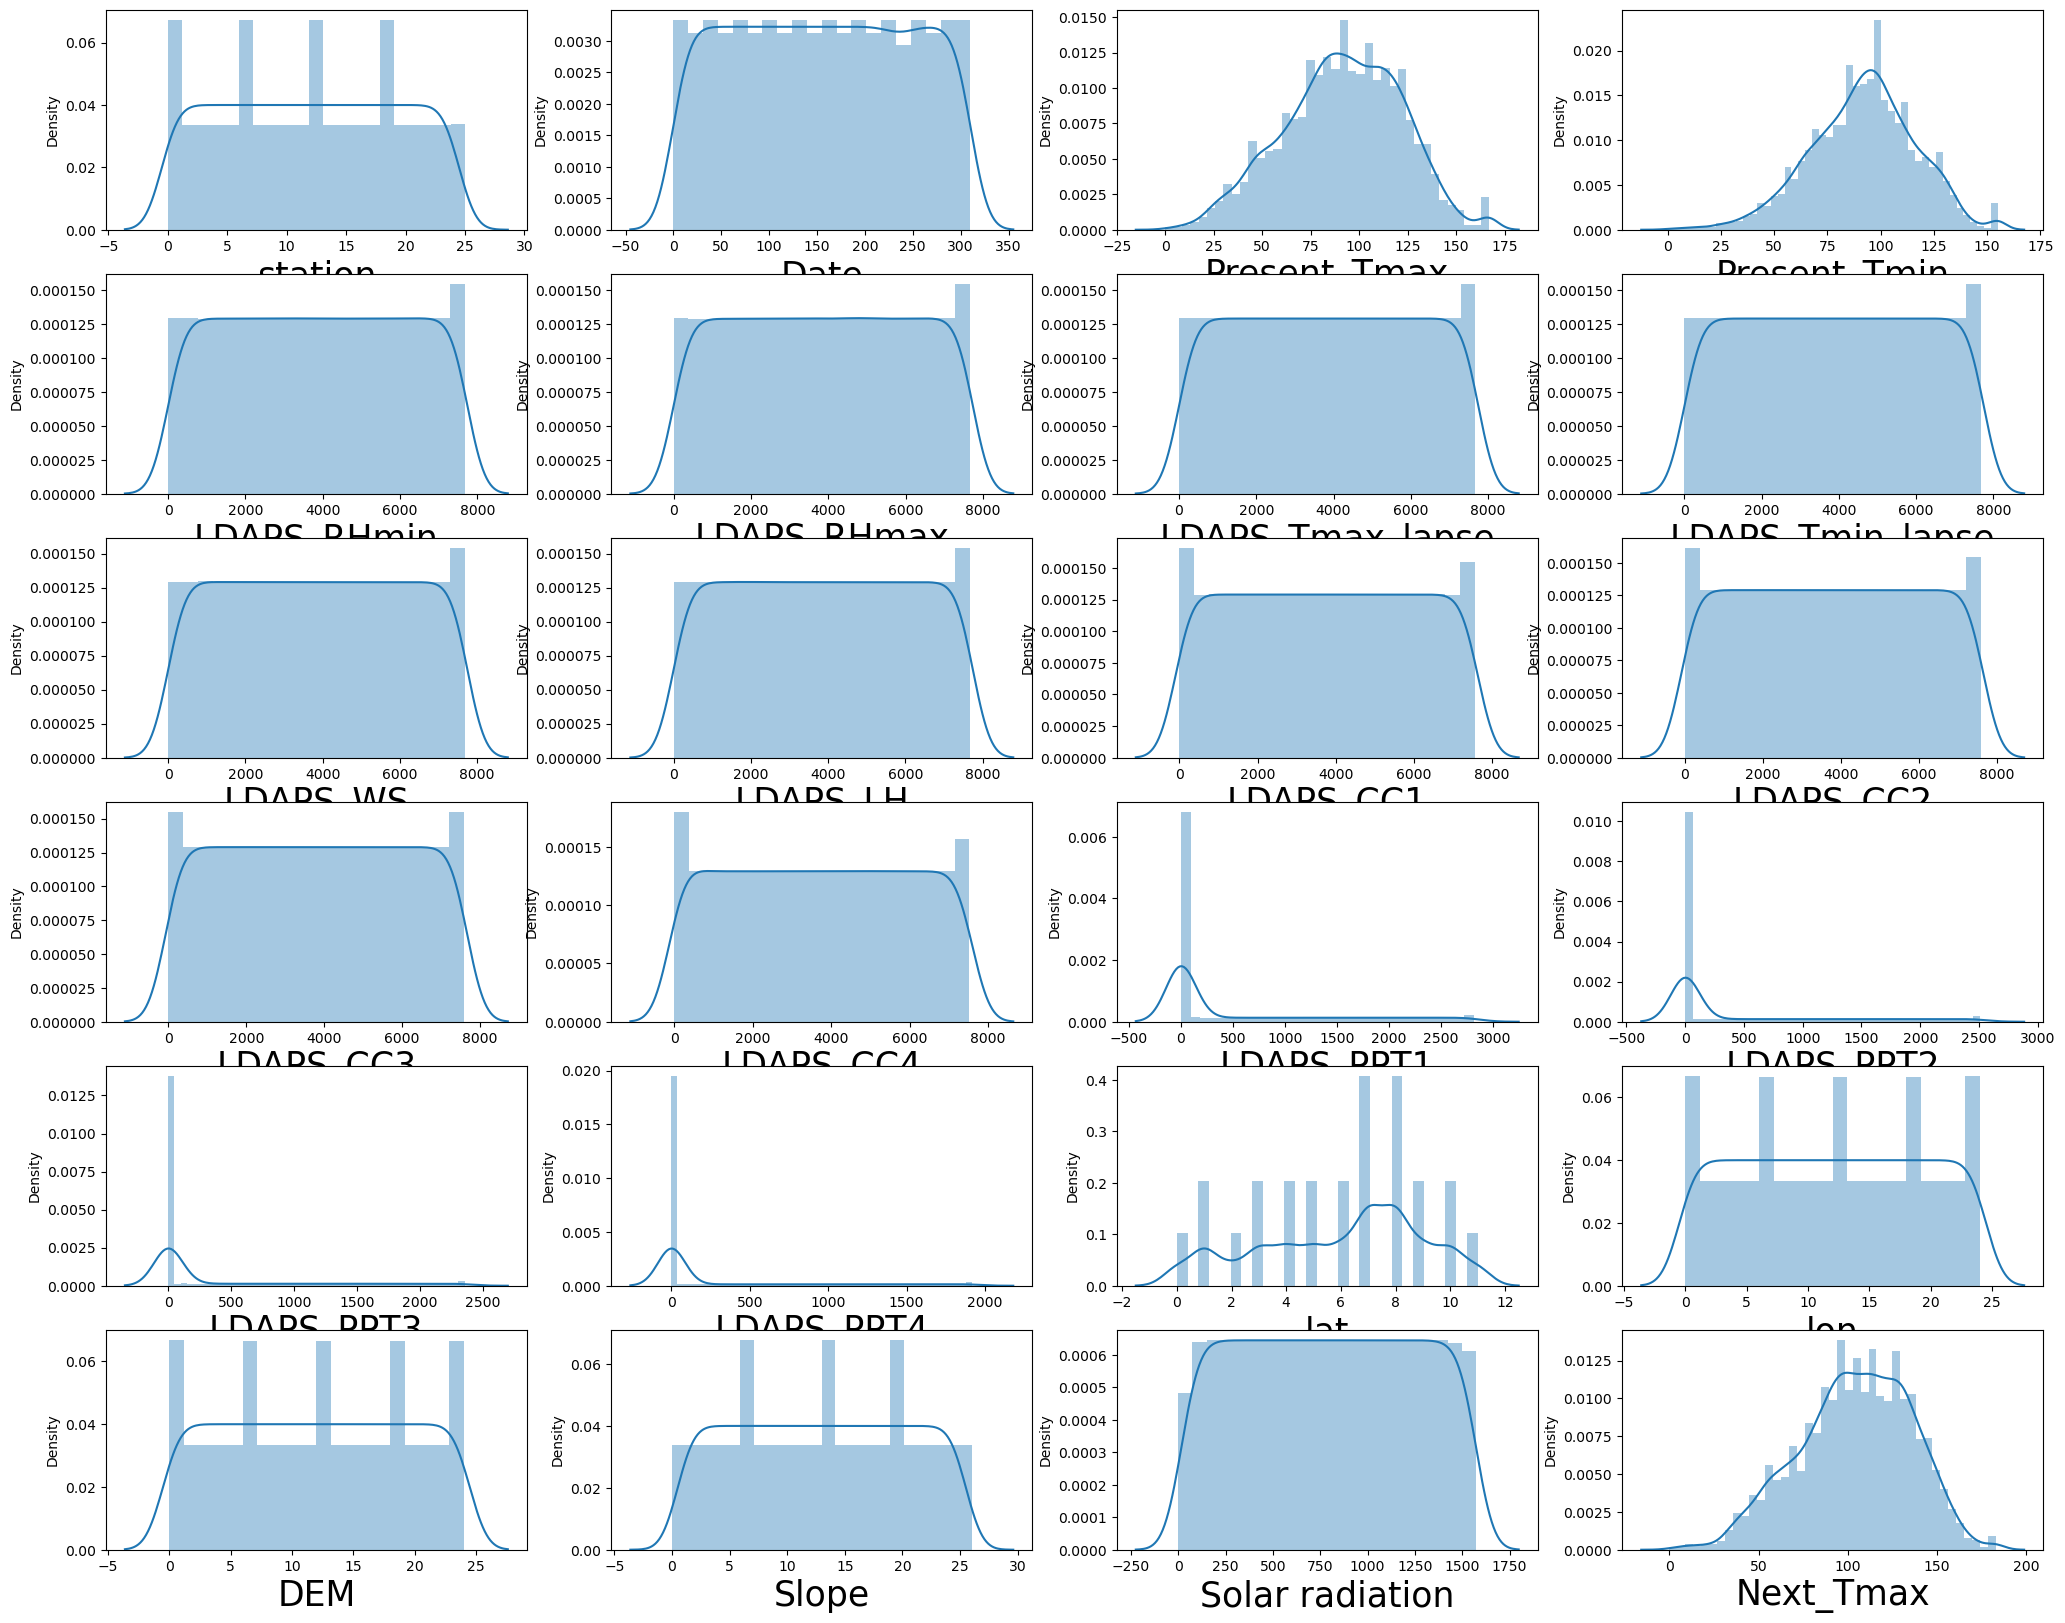

In [371]:
#Let's Plot graph for more clarification
plt.figure(figsize=(25,20))
plot=1

for column in df5:
   if plot<=24:
       a=plt.subplot(6,4,plot)
       sns.distplot(df5[column])
       plt.xlabel(column, fontsize=25)
    
   plot +=1 
plt.show()

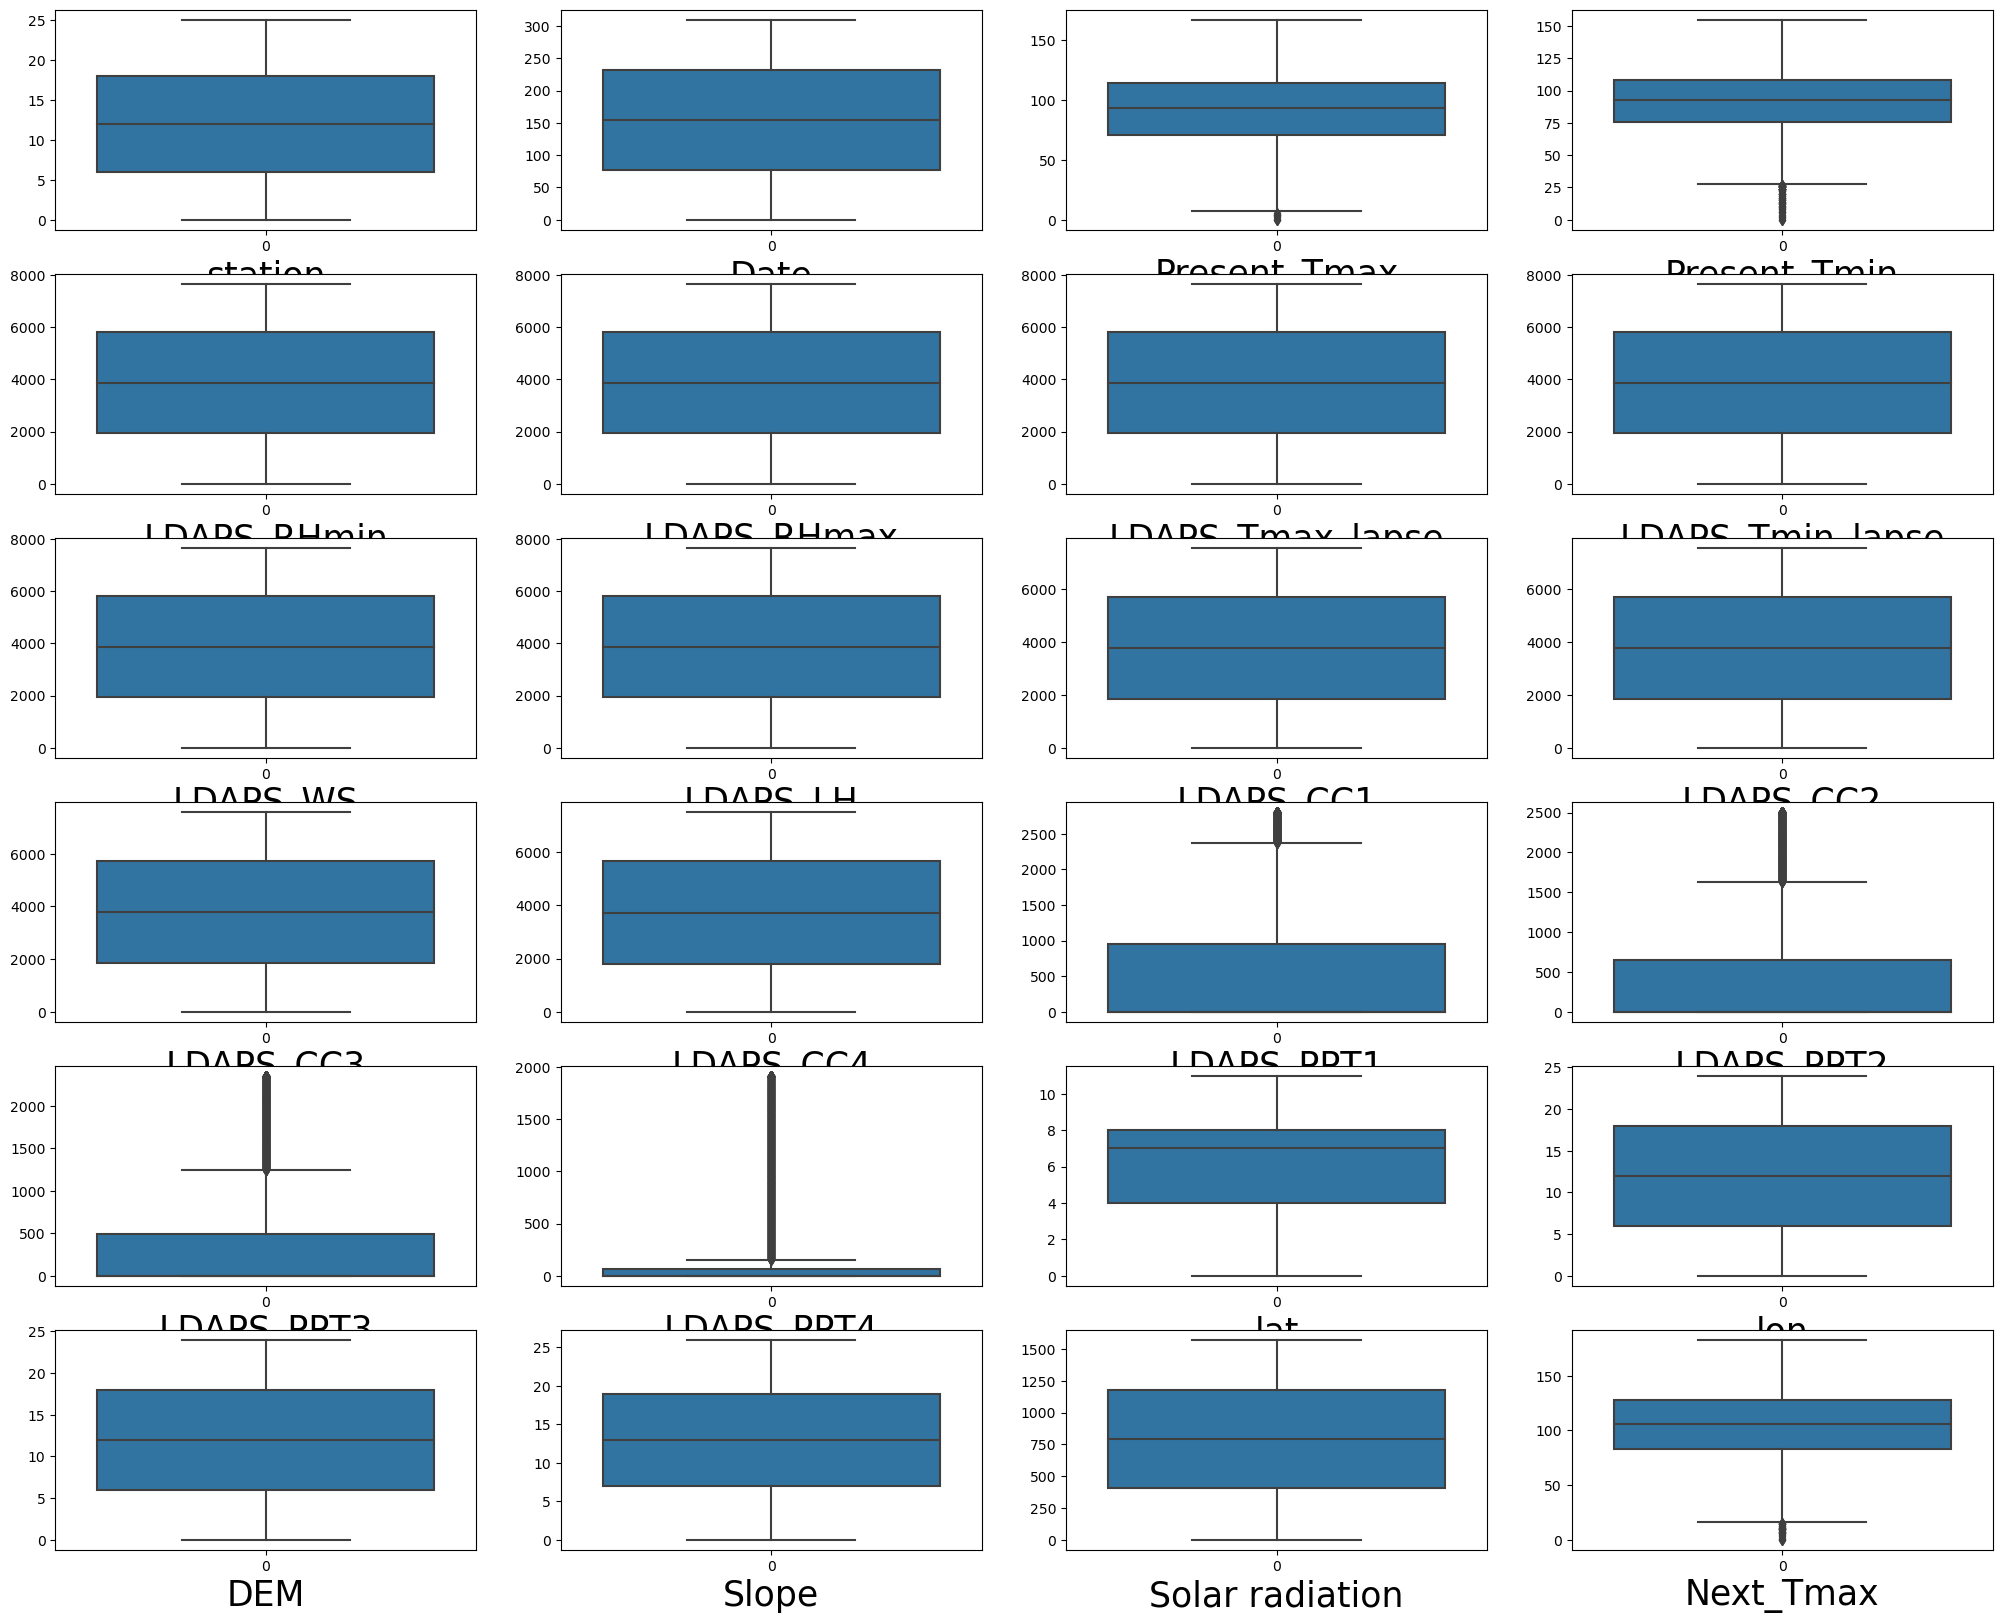

In [373]:
plt.figure(figsize=(25,20))
plot=1

for column in df5:
   if plot<=24:
       a=plt.subplot(6,4,plot)
       sns.boxplot(df5[column])
       plt.xlabel(column, fontsize=25)
    
   plot +=1 
plt.show()

In [374]:
#Zscore method to remove outliers
from scipy.stats import zscore
scor= zscore(df5)
abscore=np.abs(scor)

filte= (abscore<3).all(axis=1)
df5=df5[filte]
df5

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,0,213,80,73,4445,4441,2281,2868,5100,5873,...,0,0,0,9,11,8,23,1574,92,75
1,11,213,112,75,3258,4182,3984,4228,2715,4399,...,0,0,0,9,16,15,10,1531,106,88
2,18,213,109,92,2472,1849,4243,5013,3729,1778,...,0,0,0,8,19,13,6,1517,112,102
3,19,213,113,93,4441,6944,3839,3267,2641,5623,...,0,0,0,11,14,16,21,1500,118,106
4,20,213,107,78,4047,3994,3253,3465,2809,319,...,0,0,0,7,24,14,9,1510,113,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7746,14,229,18,33,118,1792,1241,166,2885,6708,...,0,0,0,4,22,7,2,29,81,34
7747,15,229,26,30,44,900,1042,268,3754,6058,...,0,0,0,6,2,3,4,30,84,44
7748,16,229,26,36,14,682,1442,263,4600,3916,...,0,0,0,5,3,4,5,26,87,51
7749,17,229,25,33,12,671,2146,232,5735,7160,...,0,0,0,5,9,5,7,35,79,37


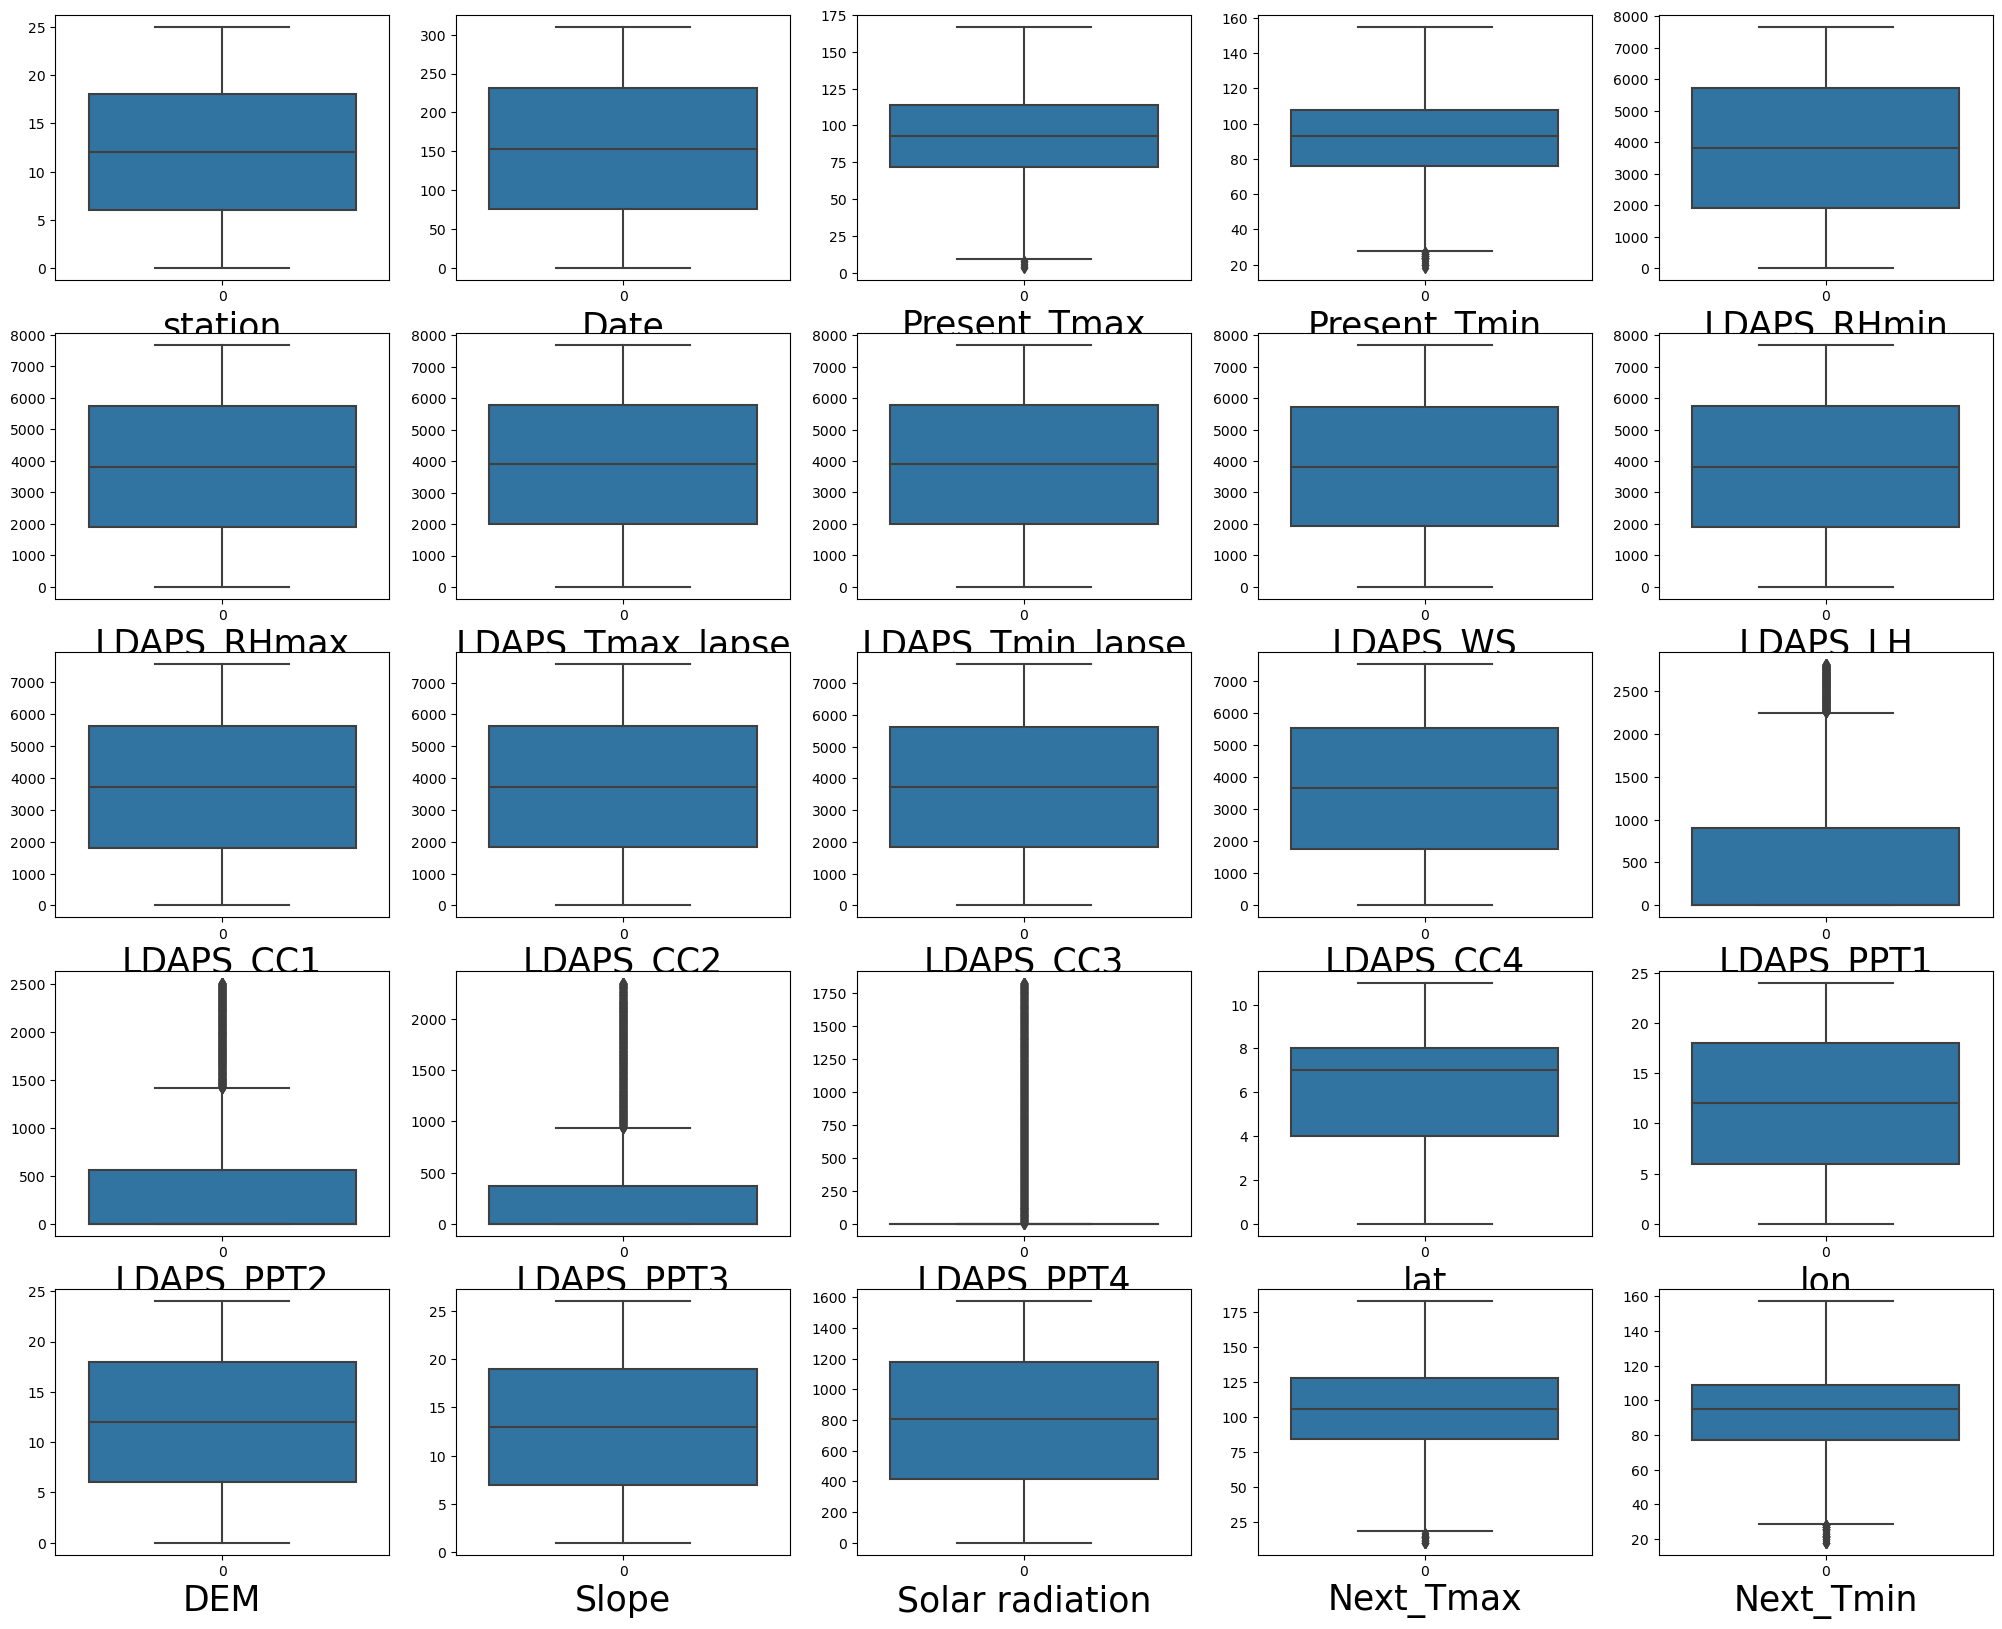

In [375]:
plt.figure(figsize=(25,20))
plot=1

for column in df5:
   if plot<=25:
       a=plt.subplot(5,5,plot)
       sns.boxplot(df5[column])
       plt.xlabel(column, fontsize=25)
    
   plot +=1 
plt.show()

In [359]:
# Let's remove outlier  using inter quantile range method:
q3=df5.quantile(0.75)
q1=df5.quantile(0.25)
iqr=q3-q1
iqr

station               12.00
Date                 155.00
Present_Tmax          43.00
Present_Tmin          32.00
LDAPS_RHmin         3874.50
LDAPS_RHmax         3868.50
LDAPS_Tmax_lapse    3875.50
LDAPS_Tmin_lapse    3875.50
LDAPS_WS            3875.50
LDAPS_LH            3875.50
LDAPS_CC1           3875.50
LDAPS_CC2           3875.50
LDAPS_CC3           3875.50
LDAPS_CC4           3874.50
LDAPS_PPT1           950.25
LDAPS_PPT2           651.25
LDAPS_PPT3           497.25
LDAPS_PPT4            61.25
lat                    4.00
lon                   12.00
DEM                   12.00
Slope                 12.00
Solar radiation      775.00
Next_Tmax             45.00
Next_Tmin             32.00
dtype: float64

In [342]:
p1= (q3.LDAPS_PPT1+ (1.5* iqr.LDAPS_PPT1))
index= np.where(df5['LDAPS_PPT1']> p1)
print(index)
df5= df5.drop(df5.index[index])
df5.reset_index()


(array([ 103,  105,  106,  107,  109,  111,  115,  117,  118,  119,  121,
        123,  127,  128,  129,  130,  131,  132,  133,  134,  135,  136,
        137,  138,  139,  140,  141,  142,  143,  144,  145,  146,  147,
        148,  149,  150,  151,  177,  178,  179,  180,  181,  182,  183,
        184,  185,  186,  187,  188,  189,  190,  191,  192,  193,  194,
        195,  196,  197,  198,  199,  200,  201,  202,  203,  204,  205,
        206,  207,  208,  209,  210,  211,  212,  213,  214,  215,  216,
        217,  218,  219,  220,  221,  222,  223,  224,  225,  226,  227,
        228,  233,  240,  241,  242,  243,  244,  245,  246,  247,  248,
        249,  250,  251,  252,  253,  254,  255,  256,  257,  258,  259,
        260,  261,  262,  263,  264,  265,  266,  268,  276,  278,  280,
        281,  284,  377,  378,  379,  380,  381,  382,  383,  384,  385,
        386,  387,  388,  389,  390,  391,  392,  393,  394,  395,  396,
        397,  398,  399,  400,  401,  477,  478,  

,index,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,0,213,80,73,4445,4441,2281,2868,5100,5873,...,0,0,0,9,11,8,23,1574,92,75
1,1,213,112,75,3258,4182,3984,4228,2715,4399,...,0,0,0,9,16,15,10,1531,106,88
2,2,213,109,92,2472,1849,4243,5013,3729,1778,...,0,0,0,8,19,13,6,1517,112,102
3,3,213,113,93,4441,6944,3839,3267,2641,5623,...,0,0,0,11,14,16,21,1500,118,106
4,4,213,107,78,4047,3994,3253,3465,2809,319,...,0,0,0,7,24,14,9,1510,113,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5078,7746,229,18,33,118,1792,1241,166,2885,6708,...,0,0,0,4,22,7,2,29,81,34
5079,7747,229,26,30,44,900,1042,268,3754,6058,...,0,0,0,6,2,3,4,30,84,44
5080,7748,229,26,36,14,682,1442,263,4600,3916,...,0,0,0,5,3,4,5,26,87,51
5081,7749,229,25,33,12,671,2146,232,5735,7160,...,0,0,0,5,9,5,7,35,79,37


In [343]:
p3= (q3.LDAPS_PPT3+ (1.5* iqr.LDAPS_PPT3))
index= np.where(df5['LDAPS_PPT3']> p3)
print(index)
df5= df5.drop(df5.index[index])
df5.reset_index()

(array([ 101,  102,  103,  106,  107,  108,  109,  110,  111,  114,  115,
        116,  117,  118,  121,  123,  126,  129,  131,  133,  134,  135,
        137,  138,  139,  140,  141,  142,  143,  144,  145,  146,  147,
        148,  186,  194,  203,  207,  208,  209,  210,  211,  212,  213,
        214,  215,  216,  217,  218,  219,  220,  221,  222,  223,  224,
        225,  226,  227,  228,  229,  230,  231,  232,  233,  234,  239,
        241,  242,  244,  245,  246,  247,  248,  249,  251,  252,  354,
        355,  356,  357,  358,  359,  360,  361,  362,  363,  364,  365,
        366,  367,  368,  369,  370,  371,  372,  373,  374,  375,  376,
        377,  378,  379,  380,  381,  387,  389,  396,  404,  420,  426,
        427,  428,  429,  430,  431,  432,  433,  434,  435,  436,  437,
        438,  439,  440,  441,  442,  443,  444,  445,  446,  447,  448,
        449,  450,  451,  452,  453,  454,  455,  456,  457,  458,  459,
        460,  461,  462,  463,  464,  465,  466,  

,index,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,0,213,80,73,4445,4441,2281,2868,5100,5873,...,0,0,0,9,11,8,23,1574,92,75
1,1,213,112,75,3258,4182,3984,4228,2715,4399,...,0,0,0,9,16,15,10,1531,106,88
2,2,213,109,92,2472,1849,4243,5013,3729,1778,...,0,0,0,8,19,13,6,1517,112,102
3,3,213,113,93,4441,6944,3839,3267,2641,5623,...,0,0,0,11,14,16,21,1500,118,106
4,4,213,107,78,4047,3994,3253,3465,2809,319,...,0,0,0,7,24,14,9,1510,113,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4244,7746,229,18,33,118,1792,1241,166,2885,6708,...,0,0,0,4,22,7,2,29,81,34
4245,7747,229,26,30,44,900,1042,268,3754,6058,...,0,0,0,6,2,3,4,30,84,44
4246,7748,229,26,36,14,682,1442,263,4600,3916,...,0,0,0,5,3,4,5,26,87,51
4247,7749,229,25,33,12,671,2146,232,5735,7160,...,0,0,0,5,9,5,7,35,79,37


In [362]:
p2= (q3.LDAPS_PPT2+ (1.5* iqr.LDAPS_PPT2))
index= np.where(df5['LDAPS_PPT2']>p2)
print(index)
df5= df5.drop(df5.index[index])
df5.reset_index()

(array([], dtype=int64),)


,index,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,0,0,213,80,73,4445,4441,2281,2868,5100,...,0,0,0,9,11,8,23,1574,92,75
1,1,11,213,112,75,3258,4182,3984,4228,2715,...,0,0,0,9,16,15,10,1531,106,88
2,2,18,213,109,92,2472,1849,4243,5013,3729,...,0,0,0,8,19,13,6,1517,112,102
3,3,19,213,113,93,4441,6944,3839,3267,2641,...,0,0,0,11,14,16,21,1500,118,106
4,4,20,213,107,78,4047,3994,3253,3465,2809,...,0,0,0,7,24,14,9,1510,113,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6786,7746,14,229,18,33,118,1792,1241,166,2885,...,0,0,0,4,22,7,2,29,81,34
6787,7747,15,229,26,30,44,900,1042,268,3754,...,0,0,0,6,2,3,4,30,84,44
6788,7748,16,229,26,36,14,682,1442,263,4600,...,0,0,0,5,3,4,5,26,87,51
6789,7749,17,229,25,33,12,671,2146,232,5735,...,0,0,0,5,9,5,7,35,79,37


In [345]:
p4= (q3.LDAPS_PPT4+ (1.5* iqr.LDAPS_PPT4))
index= np.where(df5['LDAPS_PPT4']> p4)
print(index)
df5= df5.drop(df5.index[index])
df5.reset_index()

(array([  95,   96,  104,  111,  516,  520,  660,  664,  665,  876,  893,
       1054, 1055, 1220, 1221, 1224, 1234, 1257, 1261, 1327, 1328, 1335,
       1373, 1457, 1460, 1461, 1473, 1480, 1481, 1493, 1499, 1575, 1586,
       1664, 1674, 1678, 1684, 1692, 1702, 1703, 1707, 1722, 1726, 1727,
       1756, 1766, 1770, 1781, 1788, 1790, 2231, 2283, 2393, 2448, 2456,
       2467, 2585, 2592, 2594, 2595, 2600, 2605, 2624, 2762, 2845, 2856,
       2892, 2943, 2944, 2946, 2947, 2952, 2953, 2954, 2980, 2983, 3517,
       3673], dtype=int64),)


,index,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,0,213,80,73,4445,4441,2281,2868,5100,5873,...,0,0,0,9,11,8,23,1574,92,75
1,1,213,112,75,3258,4182,3984,4228,2715,4399,...,0,0,0,9,16,15,10,1531,106,88
2,2,213,109,92,2472,1849,4243,5013,3729,1778,...,0,0,0,8,19,13,6,1517,112,102
3,3,213,113,93,4441,6944,3839,3267,2641,5623,...,0,0,0,11,14,16,21,1500,118,106
4,4,213,107,78,4047,3994,3253,3465,2809,319,...,0,0,0,7,24,14,9,1510,113,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3831,7746,229,18,33,118,1792,1241,166,2885,6708,...,0,0,0,4,22,7,2,29,81,34
3832,7747,229,26,30,44,900,1042,268,3754,6058,...,0,0,0,6,2,3,4,30,84,44
3833,7748,229,26,36,14,682,1442,263,4600,3916,...,0,0,0,5,3,4,5,26,87,51
3834,7749,229,25,33,12,671,2146,232,5735,7160,...,0,0,0,5,9,5,7,35,79,37


In [346]:
df5= df5.drop(df5.columns[0], axis=1)
df5

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,80,73,4445,4441,2281,2868,5100,5873,2734,2555,...,0,0,0,9,11,8,23,1574,92,75
1,112,75,3258,4182,3984,4228,2715,4399,2633,3060,...,0,0,0,9,16,15,10,1531,106,88
2,109,92,2472,1849,4243,5013,3729,1778,2426,3125,...,0,0,0,8,19,13,6,1517,112,102
3,113,93,4441,6944,3839,3267,2641,5623,2524,2765,...,0,0,0,11,14,16,21,1500,118,106
4,107,78,4047,3994,3253,3465,2809,319,1853,3035,...,0,0,0,7,24,14,9,1510,113,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7746,18,33,118,1792,1241,166,2885,6708,911,562,...,0,0,0,4,22,7,2,29,81,34
7747,26,30,44,900,1042,268,3754,6058,377,1136,...,0,0,0,6,2,3,4,30,84,44
7748,26,36,14,682,1442,263,4600,3916,460,1047,...,0,0,0,5,3,4,5,26,87,51
7749,25,33,12,671,2146,232,5735,7160,672,877,...,0,0,0,5,9,5,7,35,79,37


In [376]:
df5.shape

(7523, 25)

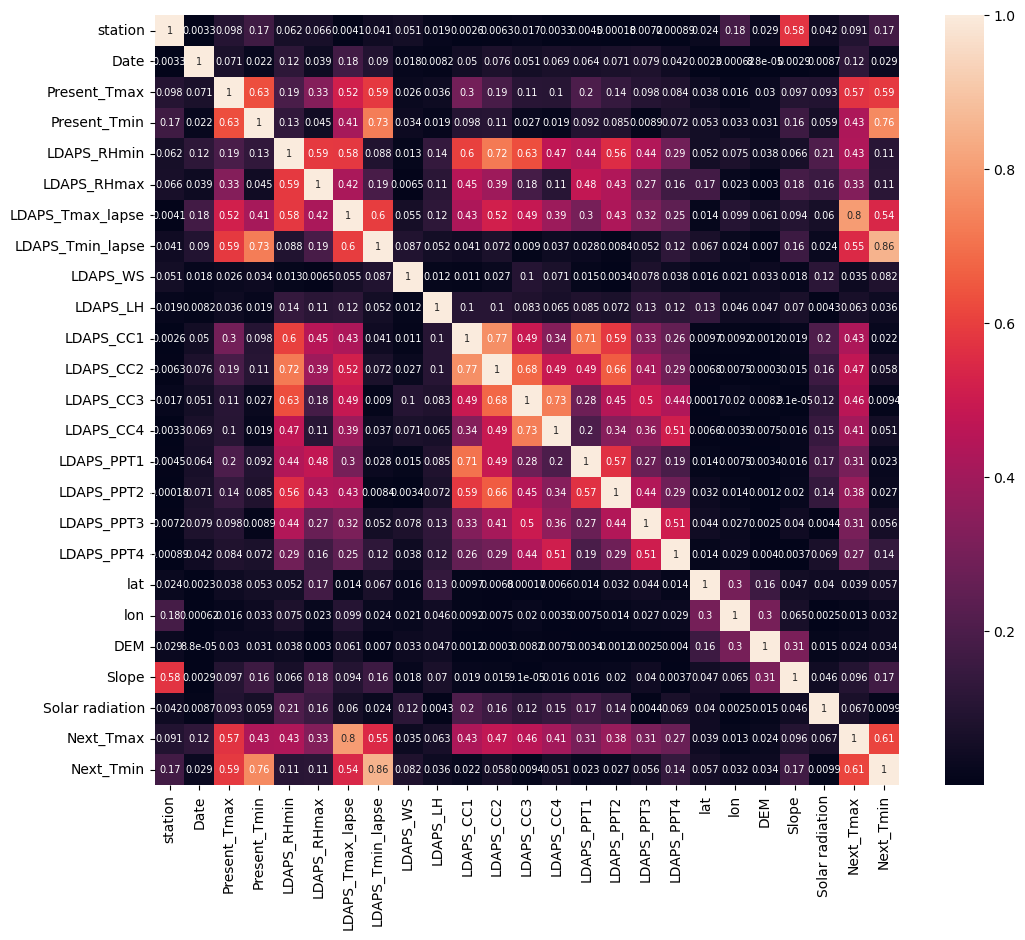

In [377]:
# HeatMap
dfheat= df5.corr().abs()
plt.figure(figsize=(12,10))
sns.heatmap(dfheat, annot=True, annot_kws={'size':7})
plt.show()

<Axes: >

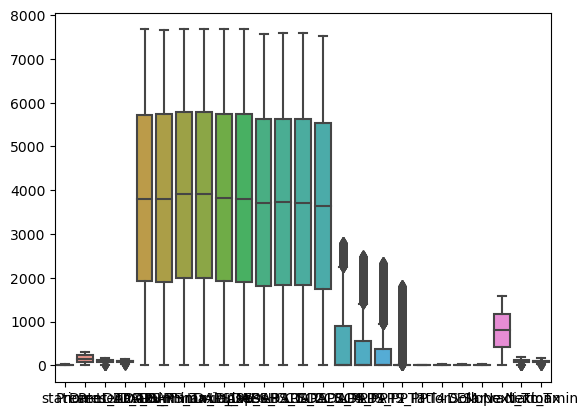

In [378]:
sns.boxplot(df5)

In [395]:
#Model Building[For Max temp]
x2=df5.drop(columns=['Next_Tmax'])
y2=df5['Next_Tmax']
x2_train, x2_test, y2_train, y2_test= train_test_split(x2,y2, test_size=0.60, random_state=76)

In [396]:
#Linear Regression
log2=LinearRegression()
log2.fit(x2_train,y2_train)
log2.score(x2_train,y2_train)

0.7512750955279361

In [397]:
#Random forest 
rmodel=RandomForestRegressor(random_state=30,n_estimators=90)
rmodel.fit(x2_train,y2_train)
y5_pred = rmodel.predict(x2_train.values)
r2= metrics.r2_score(y2_train, y5_pred)

print('R squared value: ',r2)

R squared value:  0.9824163751287205


In [398]:
#Decision tree 
tree=DecisionTreeRegressor()
tree.fit(x2_train,y2_train)
tree.score(x2_train,y2_train)

1.0

In [399]:
#Model Building[For Min temp]
x3=df5.drop(columns=['Next_Tmin'])
y3=df5['Next_Tmin']
x3_train, x3_test, y3_train, y3_test= train_test_split(x3,y3, test_size=0.75, random_state=70)

In [400]:
#Linear Regression
log3=LinearRegression()
log3.fit(x3_train,y3_train)
log3.score(x3_train,y3_train)

0.8366726164300721

In [401]:
#Random forest 
rodel=RandomForestRegressor(random_state=30,n_estimators=90)
rodel.fit(x3_train,y3_train)
y6_pred = rodel.predict(x3_train.values)
r2= metrics.r2_score(y3_train, y6_pred)

print('R squared value: ',r2)

R squared value:  0.9822032667076981


In [404]:
#Support Vector
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x3_train, y3_train)

SVR()

In [405]:
regressor.score(x3_train,y3_train)

0.7196097614724253

In [408]:
df6=pd.read_csv(r"E:\loan_prediction.csv",sep=",")
df6

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [411]:
#Here no use of Id of Employee in Analysis, So we can drop it
df6= df6.drop(df6.columns[0],axis=1)

In [412]:
df6.shape

(613, 12)

In [413]:
#We can rename column of dataset like
#df6= df6.rename(columns={"Male": "Gender", "No": "Married","0":"dependents","Graduate":"Self_employed"})
#-but here is no need because it will only take our time
#Let's proceed

,5849,0.1,Unnamed: 8,360,1
count,613.000000,613.000000,592.000000,599.000000,563.000000
mean,5402.732463,1623.890571,146.412162,341.969950,0.841918
std,6114.004114,2927.903583,85.587325,65.170672,0.365142
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,128.000000,360.000000,1.000000
75%,5780.000000,2302.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [414]:
#Check for null
df6.isnull().sum()

Male          13
No             3
0             15
Graduate       0
No.1          32
5849           0
0.1            0
Unnamed: 8    21
360           14
1             50
Urban          0
Y              0
dtype: int64

In [415]:
#Filtering categorical data
object_t=list(df6.select_dtypes(include='object'))
object_t

['Male', 'No', '0', 'Graduate', 'No.1', 'Urban', 'Y']

In [421]:
df6['Male'].replace({"Male":1, "Female":0}, inplace=True)
df6['No'].replace({"Yes":1,"No":0},inplace=True)
df6['Graduate'].replace({"Graduate":1,"Not Graduate":0},inplace=True)
df6['No.1'].replace({"Yes":1,"No":0},inplace=True)
df6['Y'].replace({"Y":1,"N":0},inplace=True)

In [422]:
#Again Filtering categorical data
object_t=list(df6.select_dtypes(include='object'))
object_t

['0', 'Urban']

In [ ]:
#Let'suse Dummy method to change dtype

In [419]:
#Here is the new dummy column for 'Dependents' and 'Property Area'
df_dum= pd.get_dummies(df6[object_t],drop_first=True)

In [423]:
df_dum

,0_1,0_2,0_3+,Urban_1,Urban_Semiurban
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,1,0,1,0
...,...,...,...,...,...
608,0,0,0,0,0
609,0,0,1,0,0
610,1,0,0,1,0
611,0,1,0,1,0


In [424]:
#Let's join this in our data and remove original column
#We can drop previous 'Dependents' and 'Property Area ' column to add new dummy columns

df6=df6.join(df_dum)
df6.drop(['0', 'Urban'], axis=1, inplace=True)
df6

,Male,No,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Y,0_1,0_2,0_3+,Urban_1,Urban_Semiurban
0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,0
1,1.0,1.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,0,0,0,1,0
2,1.0,1.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,0,0,0,1,0
3,1.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,0,0,0,1,0
4,1.0,1.0,1,1.0,5417,4196.0,267.0,360.0,1.0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,1,0,0,0,0,0
609,1.0,1.0,1,0.0,4106,0.0,40.0,180.0,1.0,1,0,0,1,0,0
610,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,1,1,0,0,1,0
611,1.0,1.0,1,0.0,7583,0.0,187.0,360.0,1.0,1,0,1,0,1,0


In [430]:
df6.isnull().sum()

Male               13
No                  3
Graduate            0
No.1               32
5849                0
0.1                 0
Unnamed: 8         21
360                14
1                  50
Y                   0
0_1                 0
0_2                 0
0_3+                0
Urban_1             0
Urban_Semiurban     0
dtype: int64

In [443]:
df7 = df6.iloc[:,[6]]
df7

,Unnamed: 8
0,128.0
1,66.0
2,120.0
3,141.0
4,267.0
...,...
608,71.0
609,40.0
610,253.0
611,187.0


In [445]:
#Filling Null values we can use Encoders
label = LabelEncoder()
df6['Male'] = label.fit_transform(df6['Male'])
df6['No'] = label.fit_transform(df6['No'])
df6['No.1'] = label.fit_transform(df6['No.1'])
df6.iloc[:,[6]]=label.fit_transform(df6.iloc[:,[6]])
df6['1'] = label.fit_transform(df6['1'])
df6['360'] = label.fit_transform(df6['360'])

In [446]:
df6

,Male,No,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Y,0_1,0_2,0_3+,Urban_1,Urban_Semiurban
0,1,1,1,0,4583,1508.0,81,8,1,0,1,0,0,0,0
1,1,1,1,1,3000,0.0,26,8,1,1,0,0,0,1,0
2,1,1,0,0,2583,2358.0,73,8,1,1,0,0,0,1,0
3,1,0,1,0,6000,0.0,94,8,1,1,0,0,0,1,0
4,1,1,1,1,5417,4196.0,168,8,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,0,0,1,0,2900,0.0,29,8,1,1,0,0,0,0,0
609,1,1,1,0,4106,0.0,7,5,1,1,0,0,1,0,0
610,1,1,1,0,8072,240.0,162,8,1,1,1,0,0,1,0
611,1,1,1,0,7583,0.0,132,8,1,1,0,1,0,1,0


In [447]:
#Again checking for null
df6.isnull().sum()

Male               0
No                 0
Graduate           0
No.1               0
5849               0
0.1                0
Unnamed: 8         0
360                0
1                  0
Y                  0
0_1                0
0_2                0
0_3+               0
Urban_1            0
Urban_Semiurban    0
dtype: int64

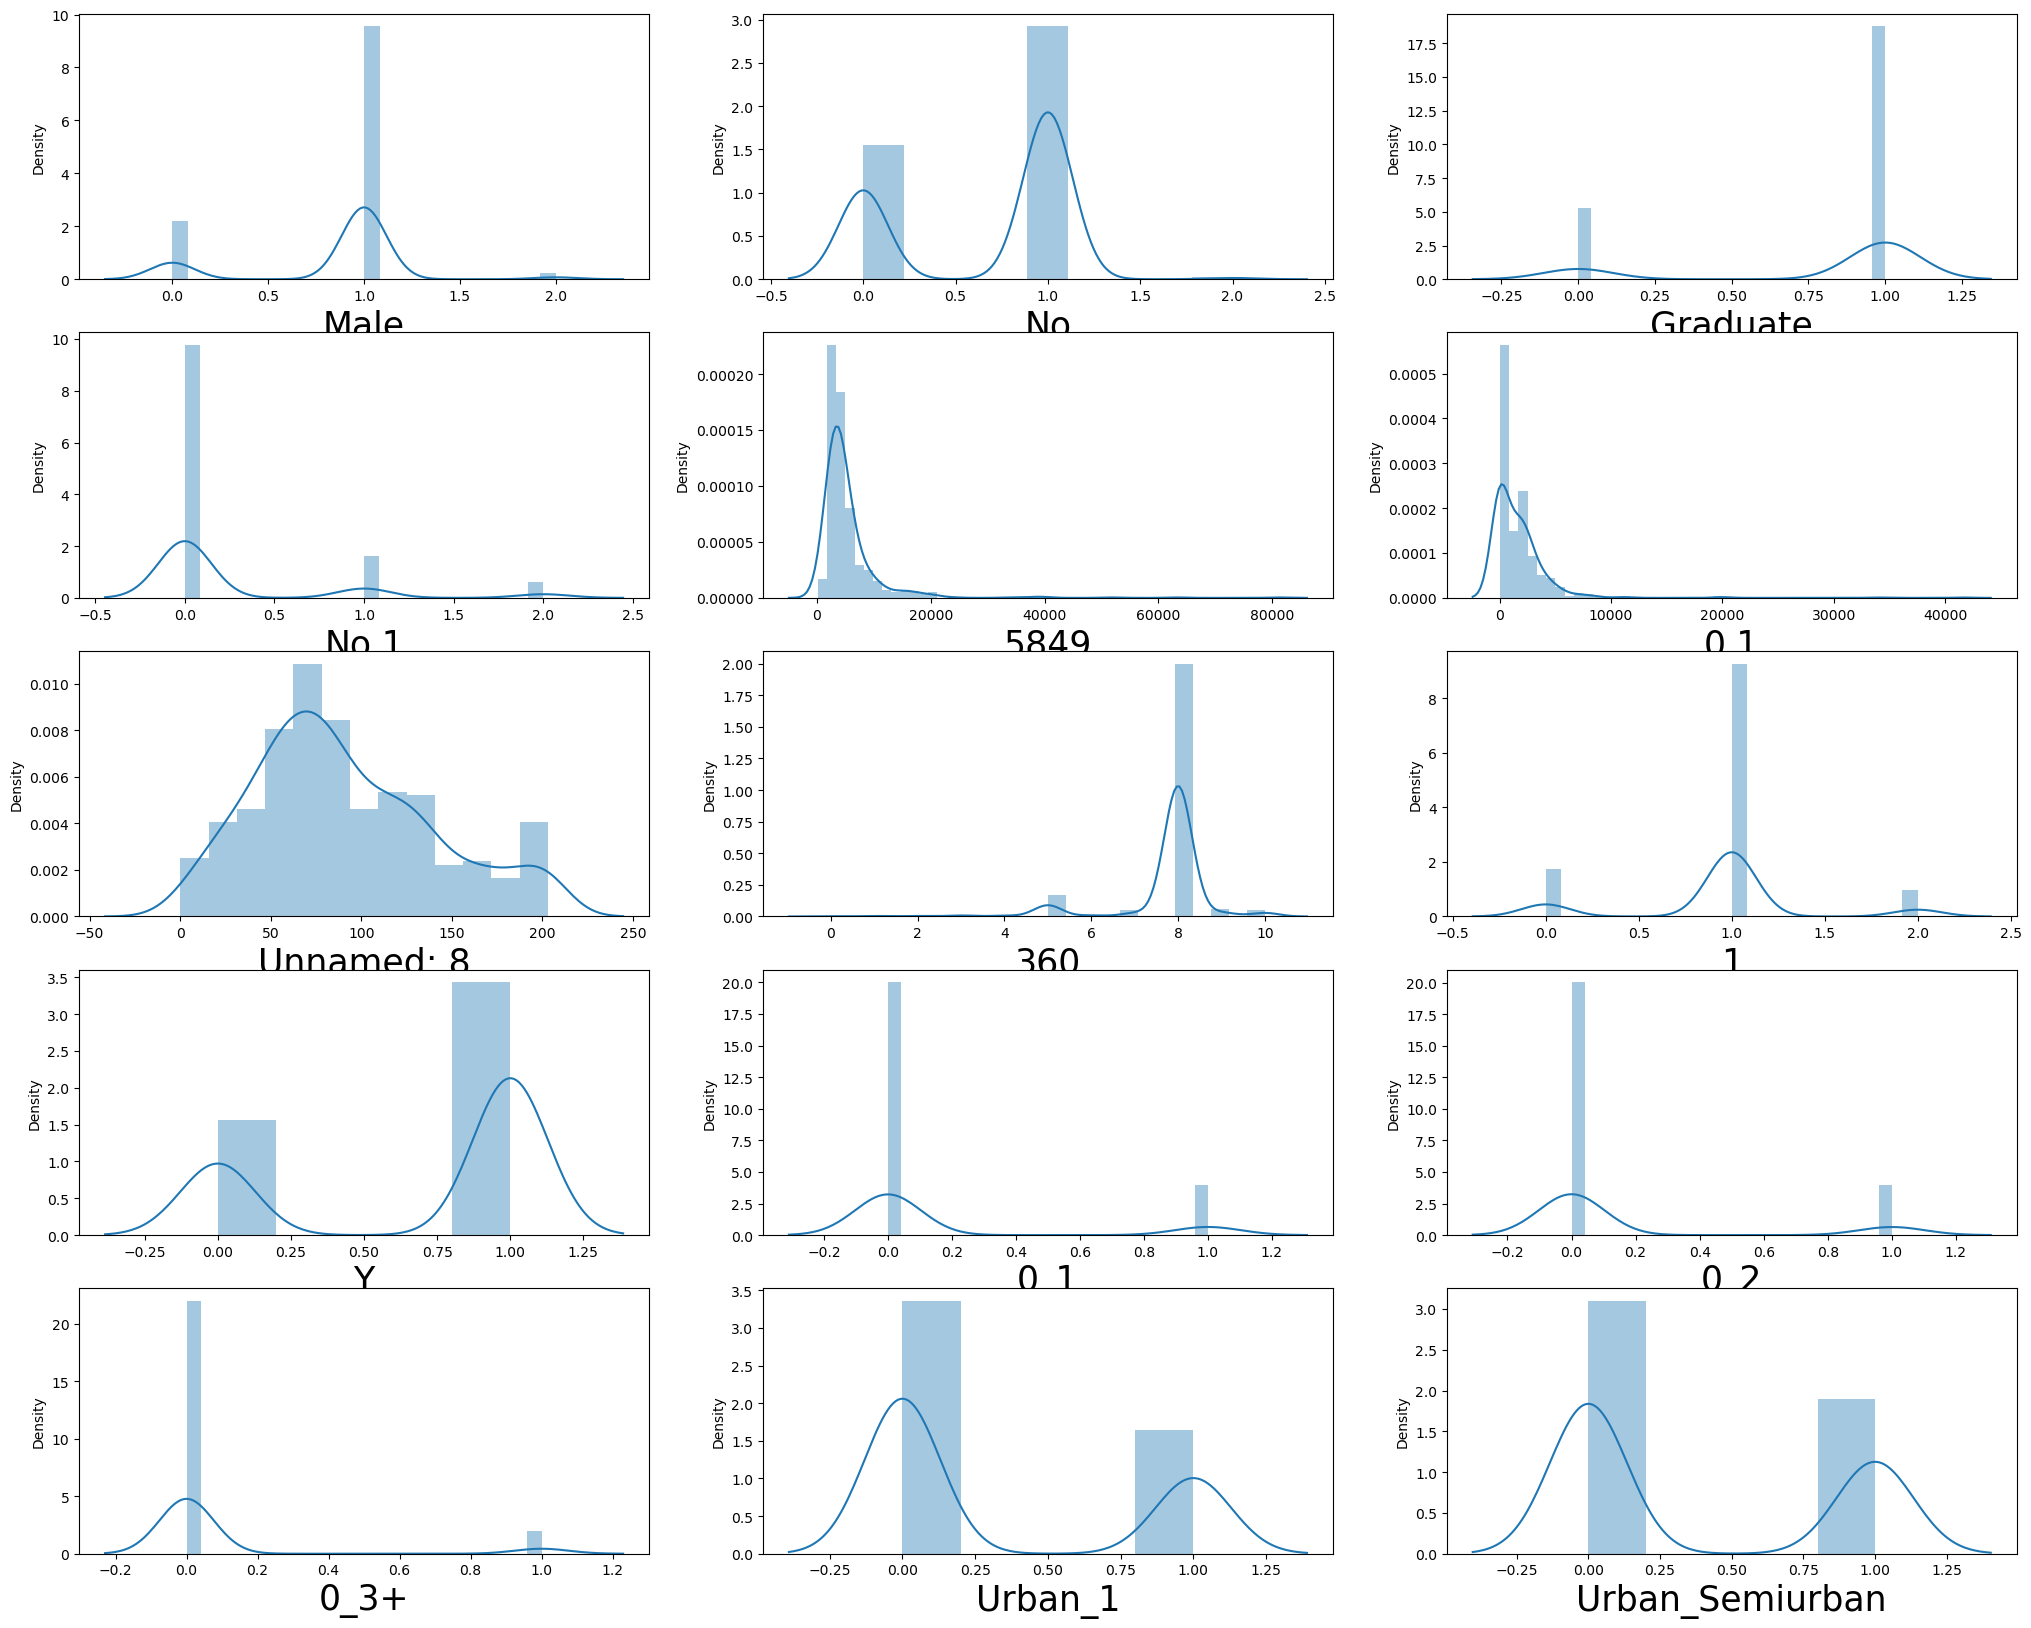

In [449]:
plt.figure(figsize=(25,20))
plot=1

for column in df6:
   if plot<=15:
       a=plt.subplot(5,3,plot)
       sns.distplot(df6[column])
       plt.xlabel(column, fontsize=25)
    
   plot +=1 
plt.show()

In [450]:
#Zscore method to remove outliers
from scipy.stats import zscore
scor= zscore(df6)
abscore=np.abs(scor)

filte= (abscore<3).all(axis=1)
df6=df6[filte]
df6

,Male,No,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Y,0_1,0_2,0_3+,Urban_1,Urban_Semiurban
0,1,1,1,0,4583,1508.0,81,8,1,0,1,0,0,0,0
1,1,1,1,1,3000,0.0,26,8,1,1,0,0,0,1,0
2,1,1,0,0,2583,2358.0,73,8,1,1,0,0,0,1,0
3,1,0,1,0,6000,0.0,94,8,1,1,0,0,0,1,0
4,1,1,1,1,5417,4196.0,168,8,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,1,1,1,0,3232,1950.0,61,8,1,1,0,0,0,0,0
608,0,0,1,0,2900,0.0,29,8,1,1,0,0,0,0,0
610,1,1,1,0,8072,240.0,162,8,1,1,1,0,0,1,0
611,1,1,1,0,7583,0.0,132,8,1,1,0,1,0,1,0


<Axes: >

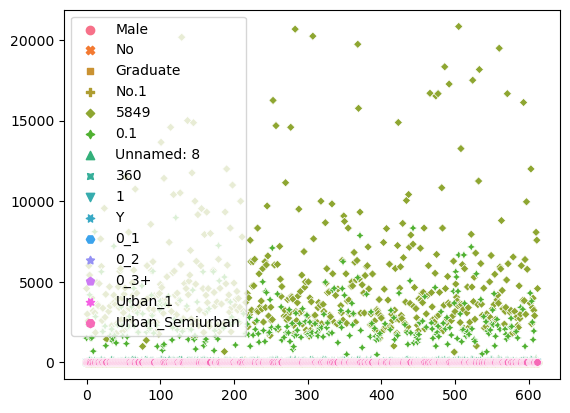

In [453]:
sns.scatterplot(df6)

In [454]:
df6.rename(columns={"Y":"Loan_Status"})

,Male,No,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Loan_Status,0_1,0_2,0_3+,Urban_1,Urban_Semiurban
0,1,1,1,0,4583,1508.0,81,8,1,0,1,0,0,0,0
1,1,1,1,1,3000,0.0,26,8,1,1,0,0,0,1,0
2,1,1,0,0,2583,2358.0,73,8,1,1,0,0,0,1,0
3,1,0,1,0,6000,0.0,94,8,1,1,0,0,0,1,0
4,1,1,1,1,5417,4196.0,168,8,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,1,1,1,0,3232,1950.0,61,8,1,1,0,0,0,0,0
608,0,0,1,0,2900,0.0,29,8,1,1,0,0,0,0,0
610,1,1,1,0,8072,240.0,162,8,1,1,1,0,0,1,0
611,1,1,1,0,7583,0.0,132,8,1,1,0,1,0,1,0


<Axes: xlabel='Male', ylabel='Y'>

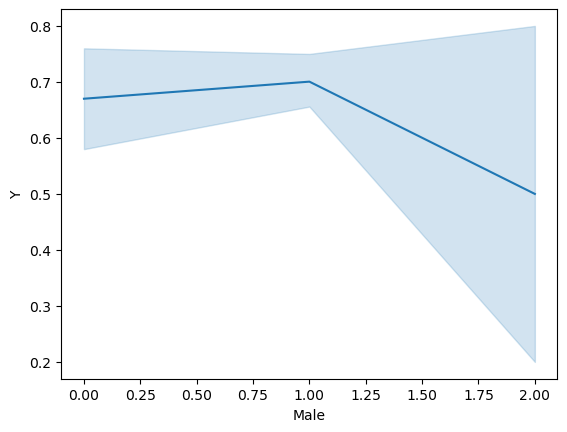

In [457]:
#Relation of 'Gender' with 'Loan_Status'
sns.lineplot(x='Male', y='Y',data=df6)

<Axes: xlabel='Graduate', ylabel='Y'>

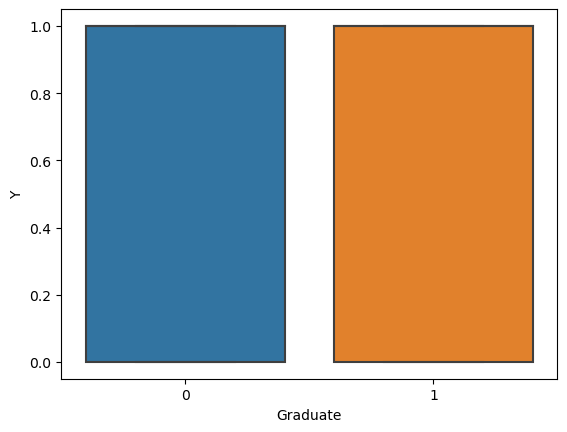

In [460]:
#Relation of 'Education' with 'Loan_Status'
sns.boxplot(x='Graduate', y='Y',data=df6)


<Axes: xlabel='5849', ylabel='Y'>

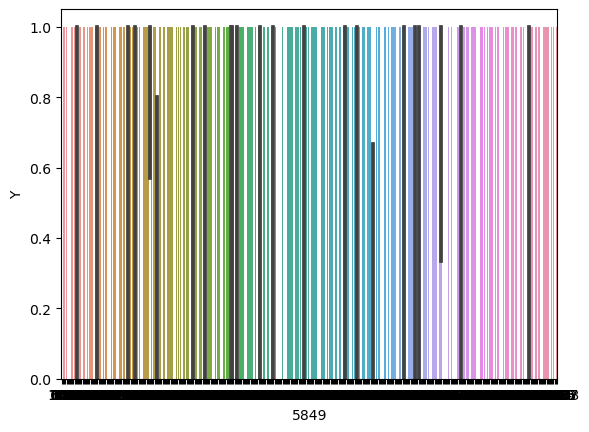

In [462]:
#Relation of 'Applicant_Income' with 'Loan_Status'
sns.barplot(x='5849', y='Y',data=df6)

In [469]:
#Model Building
x3=df6.drop(columns=['Y'])
y3=df6['Y']
x3_train, x3_test, y3_train, y3_test= train_test_split(x3,y3, test_size=0.70, random_state=60)

In [525]:
#RandomForest classifier Model
mod = RandomForestClassifier(n_estimators =77)  
mod.fit(x3_train, y3_train)
y_pred = clf.predict(x3_test)
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y3_test, y_pred))

ACCURACY OF THE MODEL: 0.7916666666666666


In [477]:
#Decision tree classifier Model
clf = DecisionTreeClassifier() 
clf.fit(x3_train, y3_train)
y_pred = clf.predict(x3_test)
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y3_test, y_pred))

ACCURACY OF THE MODEL: 0.6638888888888889


In [487]:
#Kneighbour classifier Model
clf = KNeighborsClassifier(n_neighbors=19)
clf.fit(x3_train, y3_train)
y_pred = clf.predict(x3_test)
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y3_test, y_pred))

ACCURACY OF THE MODEL: 0.7138888888888889


In [495]:
#Random forest gives better result

In [524]:
#Model Tuning

from sklearn.svm import SVC
params = {'n_estimators':[12,11],'criterion':['entropy','gini'],'max_depth':[10,5],'min_samples_split':[10,15],
         'min_samples_leaf':[4,6]}
grd=GridSearchCV(random_model,param_grid=params)
grd.fit(x3_train,y3_train)
print('best',grd.best_params_)


best {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 15, 'n_estimators': 12}


In [526]:

mod=grd.best_estimator_
mod.fit(x3_train,y3_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=15, n_estimators=12)

In [527]:
y10_pred = mod.predict(x3_test)
print("NEW ACCURACY OF THE MODEL:", metrics.accuracy_score(y3_test, y10_pred))

NEW ACCURACY OF THE MODEL: 0.8361111111111111


In [ ]:
#So, we got better result